Unzip datasets and prepare data:

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from multi_imbalance.datasets import load_datasets
from multi_imbalance.resampling.ccr import CCR
from multi_imbalance.utils.data import construct_flat_2pc_df

%matplotlib inline
sns.set_style("darkgrid")

dataset  = load_datasets()['cmc']
X, y = dataset.data, dataset.target
print(X[:5])
print(y[:5])


[[24.  2.  3.  3.  1.  1.  2.  3.  0.]
 [45.  1.  3. 10.  1.  1.  3.  4.  0.]
 [43.  2.  3.  7.  1.  1.  3.  4.  0.]
 [42.  3.  2.  9.  1.  1.  3.  3.  0.]
 [36.  3.  3.  8.  1.  1.  3.  2.  0.]]
[0 0 0 0 0]


Treat the data as binary problem with majority class = 0 and minority class = 1

In [2]:
Counter(y)

Counter({0: 629, 1: 333, 2: 511})

In [3]:
y[y != 1] = 0
Counter(y)

Counter({0: 1140, 1: 333})

Resample data using CCR algorithm with energy high enough for translation to be visible on the plots

In [4]:
clf = CCR(energy=5)
resampled_X, resampled_y = clf.fit_resample(X, y)

Compare results by plotting data in 2 dimensions

<AxesSubplot: title={'center': 'CCR'}, xlabel='x1', ylabel='x2'>

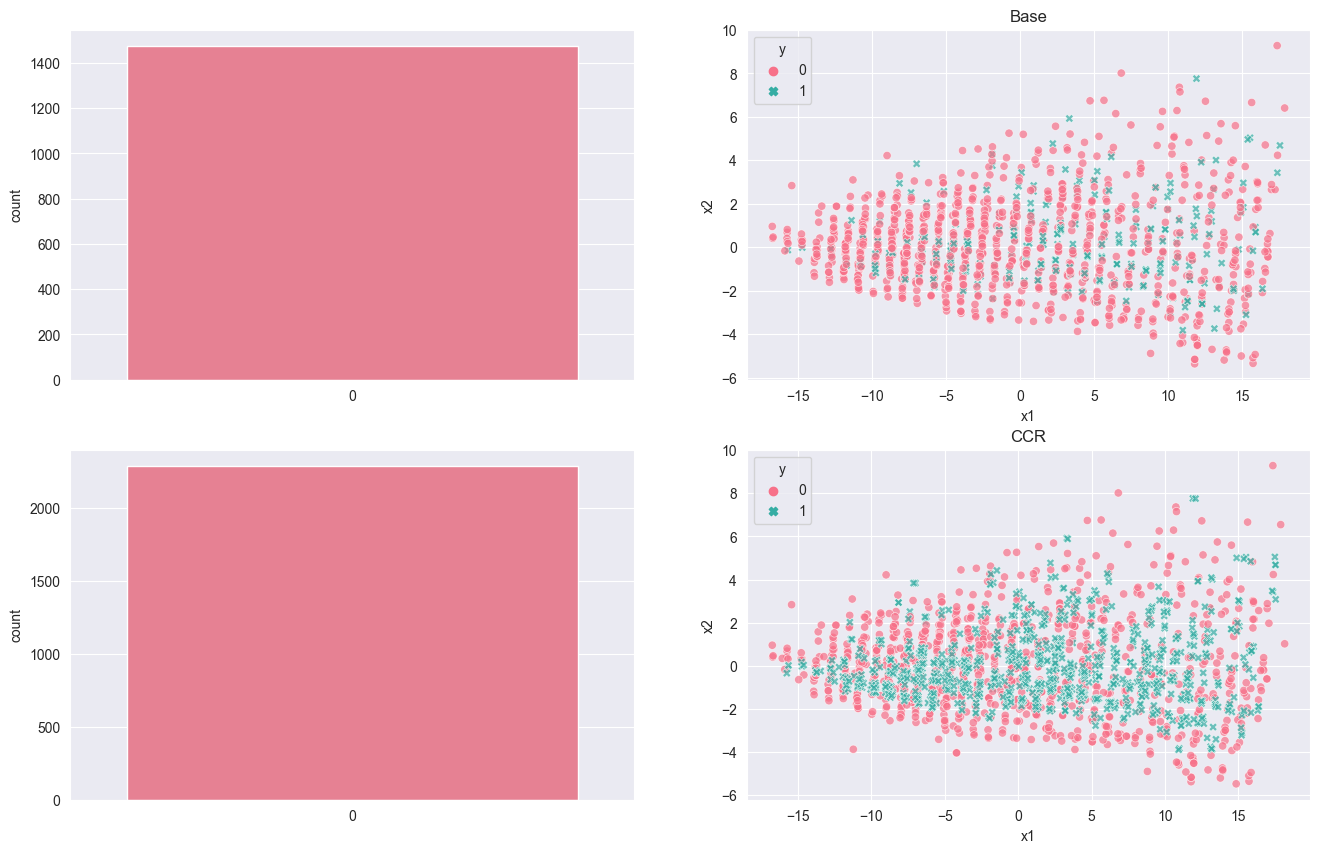

In [5]:
n = len(Counter(y).keys())
p = sns.color_palette("husl", n)

pca = PCA(n_components=2)
pca.fit(X)

fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16, 10)
axs = axs.flatten()

axs[1].set_title("Base")
sns.countplot(y, ax=axs[0], palette=p)
X = pca.transform(X)
df = construct_flat_2pc_df(X, y)
sns.scatterplot(
    x="x1",
    y="x2",
    hue="y",
    style="y",
    data=df,
    alpha=0.7,
    ax=axs[1],
    legend="full",
    palette=p,
)


axs[3].set_title("CCR")
sns.countplot(resampled_y, ax=axs[2], palette=p)
resampled_X = pca.transform(resampled_X)
df = construct_flat_2pc_df(resampled_X, resampled_y)
sns.scatterplot(
    x="x1",
    y="x2",
    hue="y",
    style="y",
    data=df,
    alpha=0.7,
    ax=axs[3],
    legend="full",
    palette=p,
)